In [13]:
import numpy as np
import pandas as pd
import xlrd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [14]:
df = pd.read_csv("../modified_data/pol_svi_sc_merged_cleaned.csv")
df.head()

,FIPS,3/31/21,AREA_SQMI,E_TOTPOP,E_HU,E_HH,E_POV,E_UNEMP,E_PCI,E_NOHSDP,...,Hopefulness,Income Per Capita,Neuroticism,Openness,Religiosity,Risk Taking,Selflessness,Tolerance,Work Ethic,dem_pct
0,1001,6589,594.443459,55200,23315,21115,8422,1065,29372,4204,...,91.163142,26168,77.925476,78.222354,91.106719,53.333333,82.142857,70.000000,60.380952,27.018365
1,1003,20505,1589.793007,208107,111945,78622,21653,4343,31203,14310,...,82.484017,28069,77.232120,80.086368,71.771566,67.272980,75.586018,66.983549,70.972246,22.409030
2,1005,2227,885.001636,25782,11937,9186,6597,918,18461,4901,...,61.927181,17249,80.375206,78.783778,73.657368,76.066481,78.753019,65.170377,68.704105,45.788173
3,1007,2542,622.461089,22527,9161,6840,2863,658,20199,2650,...,85.258871,18988,80.813736,77.837027,69.974652,75.136154,76.929754,69.859503,67.931677,20.698280
4,1009,6444,644.830460,57645,24222,20600,8220,909,22656,7861,...,79.492703,21033,78.764620,78.193105,92.045455,57.603815,79.307632,64.953288,76.000000,9.569378


In [15]:
#set index to FIPS
df = df.set_index(df['FIPS'])
df= df.drop('FIPS', axis=1)

In [16]:
#rename target column
df = df.rename(columns={'3/31/21':'first_year_cases'})

In [17]:
#create variable for case% for each counties population
df['case_pct'] = df['first_year_cases']/df['E_TOTPOP']*100
df['case_pct'].head()

FIPS
1001    11.936594
1003     9.853104
1005     8.637809
1007    11.284237
1009    11.178767
Name: case_pct, dtype: float64

In [18]:
df['case_pct'].describe()

count    3058.000000
mean        9.426600
std         3.045809
min         0.000000
25%         7.713422
50%         9.466675
75%        11.176131
max        38.010657
Name: case_pct, dtype: float64

In [19]:
# bin and cut the case_pct column into 2 classifications
# q = df['case_pct'].quantile(.75)
q = df['case_pct'].quantile(.9)
bins = [0, q , 40]
labels = ['low','high']
df['case_class'] = pd.cut(df['case_pct'], bins, labels = labels)
df['case_class']

FIPS
1001      low
1003      low
1005      low
1007      low
1009      low
         ... 
56037     low
56039    high
56041     low
56043     low
56045     low
Name: case_class, Length: 3058, dtype: category
Categories (2, object): ['low' < 'high']

In [20]:
df['case_class'].value_counts()

low     2728
high     306
Name: case_class, dtype: int64

In [21]:
#drop unneeded columns
df = df.drop('case_pct', axis =1)
df

,first_year_cases,AREA_SQMI,E_TOTPOP,E_HU,E_HH,E_POV,E_UNEMP,E_PCI,E_NOHSDP,E_AGE65,...,Income Per Capita,Neuroticism,Openness,Religiosity,Risk Taking,Selflessness,Tolerance,Work Ethic,dem_pct,case_class
FIPS,,,,,,,,,,,,,,,,,,,,,
1001,6589,594.443459,55200,23315,21115,8422,1065,29372,4204,8050,...,26168,77.925476,78.222354,91.106719,53.333333,82.142857,70.000000,60.380952,27.018365,low
1003,20505,1589.793007,208107,111945,78622,21653,4343,31203,14310,40665,...,28069,77.232120,80.086368,71.771566,67.272980,75.586018,66.983549,70.972246,22.409030,low
1005,2227,885.001636,25782,11937,9186,6597,918,18461,4901,4634,...,17249,80.375206,78.783778,73.657368,76.066481,78.753019,65.170377,68.704105,45.788173,low
1007,2542,622.461089,22527,9161,6840,2863,658,20199,2650,3661,...,18988,80.813736,77.837027,69.974652,75.136154,76.929754,69.859503,67.931677,20.698280,low
1009,6444,644.830460,57645,24222,20600,8220,909,22656,7861,10233,...,21033,78.764620,78.193105,92.045455,57.603815,79.307632,64.953288,76.000000,9.569378,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,4022,10426.975730,44117,19628,15871,5237,1213,32624,2549,4721,...,30945,79.384759,79.347081,68.147062,73.938691,76.390464,67.420658,70.956334,22.894957,low
56039,3609,3996.844622,23059,13680,9158,1619,210,53703,958,3135,...,46499,71.547359,80.522872,65.399695,79.598153,79.698193,70.877600,70.938645,66.599040,high
56041,2128,2081.719807,20609,8972,7735,2552,614,27009,934,2498,...,25636,78.771570,77.859042,67.603416,69.705859,73.332067,67.404487,69.299391,16.819960,low


In [22]:
# #drop unneeded columns first_year_cases
# df = df.drop('first_year_cases', axis =1)
# df

In [23]:
#turn case % classifications into binary 
df = pd.get_dummies(df, columns = ['case_class'])
df

,first_year_cases,AREA_SQMI,E_TOTPOP,E_HU,E_HH,E_POV,E_UNEMP,E_PCI,E_NOHSDP,E_AGE65,...,Neuroticism,Openness,Religiosity,Risk Taking,Selflessness,Tolerance,Work Ethic,dem_pct,case_class_low,case_class_high
FIPS,,,,,,,,,,,,,,,,,,,,,
1001,6589,594.443459,55200,23315,21115,8422,1065,29372,4204,8050,...,77.925476,78.222354,91.106719,53.333333,82.142857,70.000000,60.380952,27.018365,1,0
1003,20505,1589.793007,208107,111945,78622,21653,4343,31203,14310,40665,...,77.232120,80.086368,71.771566,67.272980,75.586018,66.983549,70.972246,22.409030,1,0
1005,2227,885.001636,25782,11937,9186,6597,918,18461,4901,4634,...,80.375206,78.783778,73.657368,76.066481,78.753019,65.170377,68.704105,45.788173,1,0
1007,2542,622.461089,22527,9161,6840,2863,658,20199,2650,3661,...,80.813736,77.837027,69.974652,75.136154,76.929754,69.859503,67.931677,20.698280,1,0
1009,6444,644.830460,57645,24222,20600,8220,909,22656,7861,10233,...,78.764620,78.193105,92.045455,57.603815,79.307632,64.953288,76.000000,9.569378,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,4022,10426.975730,44117,19628,15871,5237,1213,32624,2549,4721,...,79.384759,79.347081,68.147062,73.938691,76.390464,67.420658,70.956334,22.894957,1,0
56039,3609,3996.844622,23059,13680,9158,1619,210,53703,958,3135,...,71.547359,80.522872,65.399695,79.598153,79.698193,70.877600,70.938645,66.599040,0,1
56041,2128,2081.719807,20609,8972,7735,2552,614,27009,934,2498,...,78.771570,77.859042,67.603416,69.705859,73.332067,67.404487,69.299391,16.819960,1,0


## RF Regressor

In [24]:
df.shape

(3058, 44)

In [25]:
# Define feature set (x)
X = df.drop(['case_class_low','case_class_high', 'first_year_cases'], axis=1).values

#Define (y)
y= df['case_class_high'].values

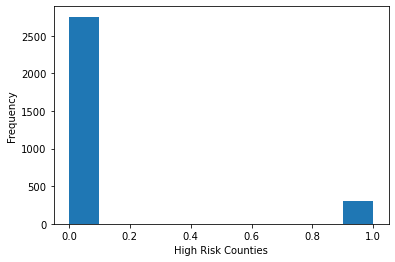

In [26]:
# frequency histogram to see how many counties are high risk and low risk
plt.hist(df["case_class_high"])
plt.xlabel("High Risk Counties")
plt.ylabel("Frequency")
plt.show()

In [27]:
#split data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3 ,random_state= 78) 

In [28]:
# Determine the shape of our training and testing sets.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2140, 41)
(918, 41)
(2140,)
(918,)


In [29]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [30]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)

In [31]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [32]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 150, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [150, 355, 561, 766, 972, 1177, 1383, 1588, 1794, 2000]}


In [35]:
from sklearn.model_selection import RandomizedSearchCV

# Use the random grid to search for best hyperparameters
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=355; total time=   3.3s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time= 2.6min
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=  24.7s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1794; total time= 6.3min
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1588; total time=  20.5s
[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1383; total time=  11.3s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimato

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [150, 355, 561, 766,
                                                         972, 1177, 1383, 1588,
                                                         1794, 2000]},
                   random_state=42, verbose=2)

In [37]:
#view best parameters 
rf_random.best_params_

{'n_estimators': 1794,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': True}

In [44]:
np.seterr(invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [45]:
# evaluate random search 


def evaluate(model, test_features, test_labels):
    predictions = model.predict(X_test_scaled)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
base_model.fit(X_train_scaled, y_train)
base_accuracy = evaluate(base_model, X_test_scaled, y_test)

Model Performance
Average Error: 0.1780 degrees.
Accuracy = nan%.


/Users/celestemoreno/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


In [41]:
# evaluate performance with best_random estimator
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test_scaled, y_test)

Model Performance
Average Error: 0.1719 degrees.
Accuracy = -inf%.


/Users/celestemoreno/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


In [42]:
# print the improvement 
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


Improvement of nan%.
